## Analyzing Multiple Data Sets

Using our experience of plotting from the first notebook, and our experience defining functions in the second, we can write a function called `analyze` that creates graphs of the minimum, average, and maximum daily inflammation rates for a single data set.  Go ahead and write that here.  Don't forget to load the relevant libraries.  Also, it's a good idea to give the magic invocation `%matplotlib inline` right at the start so that we don't forget about that either.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
def analyze(filename):
    data = np.loadtxt(fname=filename,delimiter=',')
    figure = plt.figure(figsize=(10.0, 3.0))
    plt.suptitle(filename, fontsize=10, fontweight="bold")
    plt.subplot(1, 3, 1)
    plt.ylabel('average')
    plt.plot(data.mean(0))
    plt.subplot(1, 3, 2)
    plt.ylabel('max')
    plt.plot(data.max(0))
    plt.subplot(1, 3, 3)
    plt.ylabel('min')
    plt.plot(data.min(0))
    plt.tight_layout()
    plt.show()


We can use it to analyze other data sets one by one.  Let's try it on the second data set, for a change.

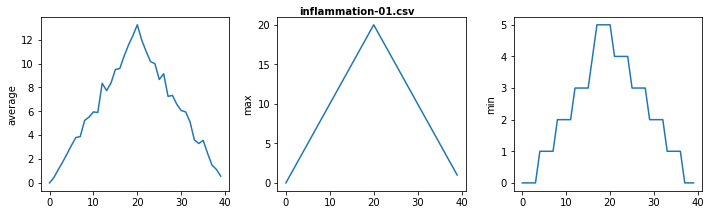

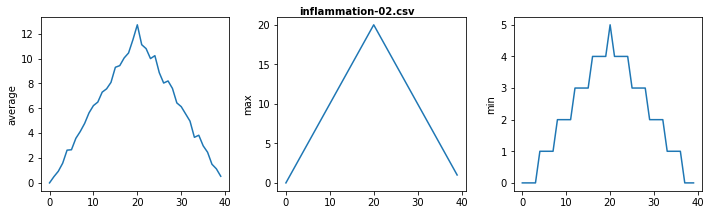

In [2]:
analyze("inflammation-01.csv")
analyze("inflammation-02.csv")

So that's convenient, but we have a dozen data sets right now and more on the way.
We want to create plots for all our data sets with a single statement.
To do that,
we'll have to teach the computer how to repeat things.

#### Objectives

*   Explain what a `for` loop does.
*   Correctly write `for` loops to repeat simple calculations.
*   Trace changes to a loop variable as the loop runs.
*   Trace changes to other variables as they are updated by a `for` loop.
*   Explain what a list is.
*   Create and index lists of simple values.
*   Use a library function to get a list of filenames that match a simple wildcard pattern.
*   Use a `for` loop to process multiple files.

### For Loops

Suppose we want to print each character in the word "lead" on a line of its own.
One way is to use four `print` statements.  For illustrative purposes, let's package this behavior up in a function (even though it's a kind of silly function).

In [3]:
def print_characters(element):
    print(element[0])
    print(element[1])
    print(element[2])
    print(element[3])

print_characters('lead')

l
e
a
d


This isn't a great approach for two reasons:

1.  It doesn't scale:
    if we want to print the characters in a string that's hundreds of letters long,
    we'd be better off just typing them in.

1.  It's fragile:
    We might accidentally forget to ask for enough characters, or we might ask to print characters that don't exist.
    
Try calling your function on some input that's *not* four letters long, just to drive the point home.

In [4]:
print_characters('tin')

t
i
n


IndexError: string index out of range

Here's a better approach, using a *`for` loop*.

``` python
def print_characters(element):
    for char in element:
        print(char)
```

Go ahead and enter that in.

In [5]:
def print_characters(element):
    for char in element:
        print(char)

This code is both succinct and robust.  Try it on some arbitrary word.

In [6]:
print_characters('tin')

t
i
n


The improved version of `print_characters` uses a [for loop](./gloss.html#for-loop)
to repeat an operation---in this case, printing---once for each thing in a collection.
The general form of a loop is:

<pre>
<strong>for</strong> <em>variable</em> <strong>in</strong> <em>collection</em><strong>:</strong>
    <em>do things with variable</em>
</pre>

We can call the [loop variable](./gloss.html#loop-variable) anything we like,
but there must be a colon at the end of the line starting the loop,
and we must indent the body of the loop.

Can you write a `for` loop that repeatedly updates a variable to count how many letters are in a string?

In [7]:
length = 0 # loop counter
for vowel in "aeiou":
    length = length + 1
print('There are', length, 'vowels')

There are 5 vowels


It's worth tracing the execution of this little program step by step.
Since there are five characters in `'aeiou'`, for example,
with this input the "update" statement will be executed five times.
The first time around,
our counter is zero 
and `vowel` is `'a'`.
The update statement adds 1 to the old value of the counter.
The next time around,
`vowel` is `'e'` and the counter is 1,
but is then updated to be 2.
After three more updates,
the counter will be 5;
then, since there is nothing left in `'aeiou'` for Python to process,
the loop finishes
and a final `print` statement tells us our final answer.

Note that a loop variable is just a variable that's being used to record progress in a loop.
It still exists after the loop is over,
and we can re-use variables previously defined as loop variables as well.  Try that now.

In [8]:
letter = 'z' #  loop variable is just a variable 
for letter in 'abc':
    print(letter)
    
print('after the loop, letter is', letter)


a
b
c
after the loop, letter is c


Note also that finding the length of a string is such a common operation
that Python actually has a built-in function to do it called `len`.  Use that function to compute the number of vowels.

In [9]:
print("number of vowels:", len("aeiou"))

number of vowels: 5


`len` has been optimized to be faster than any function we could write ourselves,
and much easier to read than a two-line loop;
it will also give us the length of other things besides strings.  We generally use built-in functions like this when we can.

#### Challenges

1.  Python has a built-in function called `range` that creates a list of numbers:
    `range(3)` produces `[0, 1, 2]`, `range(2, 5)` produces `[2, 3, 4]`, and `range(2, 10, 3)` produces `[2, 5, 8]`.
    Using `range`,
    write a function that prints $N$ natural numbers for arbitrary integer input $N$:
    
    ~~~python
    print_N(3)
    1
    2
    3
    ~~~

1.  Exponentiation is built into Python:

    ~~~python
    print 5**3
    125
    ~~~
    
    It also has a function called `pow` that calculates the same value.
    Write a function called `expo` that uses a loop to calculate the same result.

1.  Write a function called `rev` that takes a string as input, and produces a new string with the characters in reverse order:
    
    ~~~python
    print rev('Newton')
    notweN
    ~~~
    
    As always, be sure to include a docstring.

In [12]:
# print(range(3))
# 1.
def print_N(num):
    for number in range(num):
        print(number+1)
# print_N(12)

# 2.
def expo(base, power):
    result = 1
    for _ in range(power): # number of times of multiplatipn
        result *= base # multiplation of base for range times
    return result

print(expo(5, 3))

# 3.
# for l in "abc"[::-1]:
#     print(l)

def rev(string):
    l = []
    for letter in string:
        l.insert(0, letter)
    return "".join(l)
rev("abc")

assert expo(5, 3) == 5**3

assert len([1]) > 1 # this will raise an Assertion error

125


AssertionError: 

### Lists

Just as a `for` loop is a way to do operations many times,
a list is a way to store many values.
Unlike NumPy arrays,
lists are built into the basic Pyhton language.
We create a list by putting values inside square brackets:

In [17]:
odds = [1, 3, 5, 7]
print( 'odds are:', odds )

odds are: [1, 3, 5, 7]


We select individual elements from lists by indexing them.  You can use a negative index to count backwards from the end of a list.

In [19]:
print(odds[::-1])

[7, 5, 3, 1]


and if we loop over a list,
the loop variable is assigned elements from the list one at a time:

In [21]:
l = []
for number in odds:
    l.append(number)
print(l)

[1, 3, 5, 7]


There is one important difference between lists and strings:
we can change the values in a list,
but we cannot change the characters in a string.
Try creating a list and updating at some particular index.

In [22]:
names = ['Newton', 'Darwing', 'Turing'] # typo in Darwin's name
print( 'names is originally:', names )
names[1] = 'Darwin' # correct the name
print( 'final value of names:', names )

names is originally: ['Newton', 'Darwing', 'Turing']
final value of names: ['Newton', 'Darwin', 'Turing']


Now try doing that with a string.

In [23]:
name = 'Bell'
name[0] = 'b' # 'str' object does not support item assignment

TypeError: 'str' object does not support item assignment

> #### Ch-Ch-Ch-Changes
>
> Data that can be changed is called [mutable](./gloss.html#mutable),
> while data that cannot be is called [immutable](./gloss.html#immutable).
> Like strings,
> numbers are immutable:
> there's no way to make the number 0 have the value 1 or vice versa
> (at least, not in Python&mdash;there actually *are* languages that will let people do this,
> with predictably confusing results).
> Lists and arrays,
> on the other hand,
> are mutable:
> both can be modified after they have been created.
>
> Programs that modify data in place can be harder to understand than ones that don't
> because readers may have to mentally sum up many lines of code
> in order to figure out what the value of something actually is.
> On the other hand,
> programs that modify data in place instead of creating copies that are almost identical to the original
> every time they want to make a small change
> are more efficient.

There are many ways to change the contents of in lists besides assigning values to indexed elements.  Lists have an `append` method, for example.  The `del` "statement" can be used to delete arbitrary indexed elements: note that it is not a method, and although it behaves like a function, it is traditional not to put parentheses around its "argument".  And there's another method, `reverse`.  Try these now.

In [53]:
l = ["", "h", None, 0, 1, 2, 3, 4, 5, 6]
l.append(10)
l

['', 'h', None, 0, 1, 2, 3, 4, 5, 6, 10]

In [54]:
del l[-1]
print(l)
# del l["h"] # list indices must be integers or slices, not str
# print(l)

['', 'h', None, 0, 1, 2, 3, 4, 5, 6]


In [55]:
l.reverse()
l

[6, 5, 4, 3, 2, 1, 0, None, 'h', '']

#### Challenges

1.  Write a function called `total` that calculates the sum of the values in a list.
    (Python has a built-in function called `sum` that does this for you.
    Please don't use it for this exercise.)

In [56]:
def total(l):
    try:
        sum = 0
        for num in l:
            sum += num
        return sum
    except TypeError:
        print("item in list should only be int or float")

assert total([1, 2, 3, 4, 0.1, 5]) == sum([1, 2, 3, 4, 0.1, 5])



### Processing Multiple Files

We now have almost everything we need to process all our data files.
The only thing that's missing is a library with a rather unpleasant name.  Can you guess what it is?

In [24]:
import glob

The `glob` library contains a single function, also called `glob`,
that finds files whose names match a pattern.
We provide those patterns as strings:
the character `*` matches zero or more characters,
while `?` matches any one character.
We can use this to get the names of all the IPython Notebooks we have created so far:

In [28]:
print(glob.glob('*.ipynb')) # return a list of file name

['06-seaborn.ipynb', '05-defensive-clean.ipynb', '04-cond-clean.ipynb', '03-loop-clean.ipynb', '02-func-clean.ipynb', '01-numpy-clean.ipynb']


or to get the names of all our CSV data files:

In [30]:
print(glob.glob('*.csv'))

['inflammation-12.csv', 'inflammation-10.csv', 'inflammation-09.csv', 'inflammation-08.csv', 'inflammation-07.csv', 'inflammation-06.csv', 'inflammation-05.csv', 'inflammation-04.csv', 'inflammation-03.csv', 'inflammation-02.csv', 'inflammation-01.csv', 'inflammation-11.csv']


As these examples show,
`glob.glob`'s result is a list of strings,
which means we can loop over it
to do something with each filename in turn.
In our case,
the "something" we want is our `analyze` function.
Let's test this by analyzing the first three files in the list.  (Hint: remember how to use slices?)

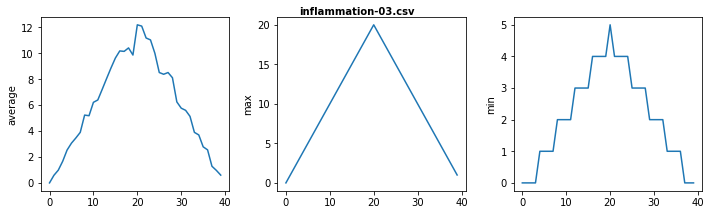

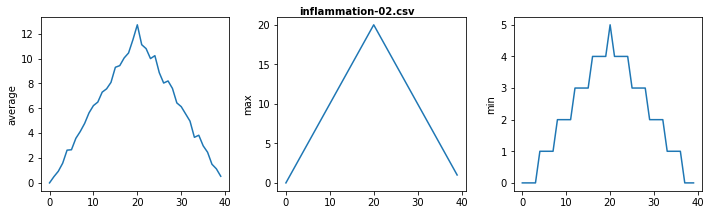

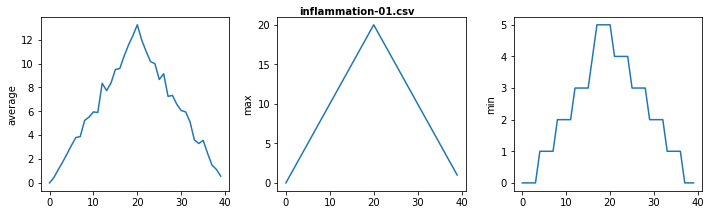

In [34]:
exp = "inflammation-0[123].csv" # regex
for file in glob.glob(exp):
    analyze(file)

Sure enough,
the maxima of these data sets show exactly the same ramp as the first,
and their minima show the same staircase structure.

#### Challenges

1.  Write a function called `analyze_all` that takes a filename pattern as its sole argument
    and runs `analyze` for each file whose name matches the pattern.

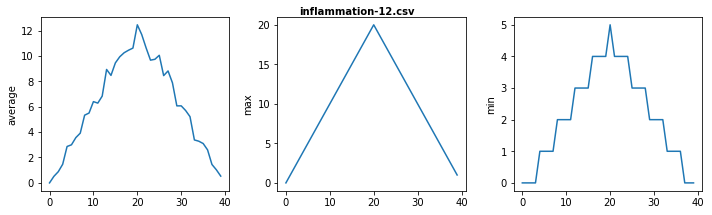

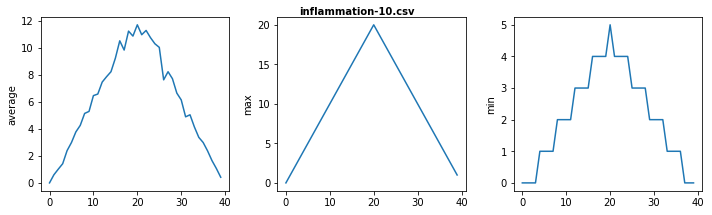

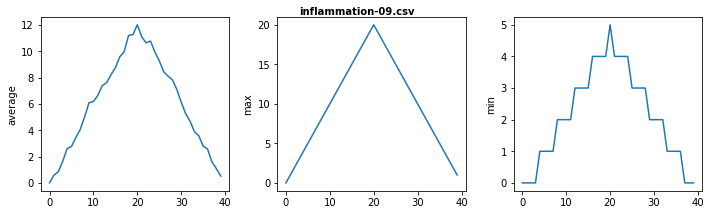

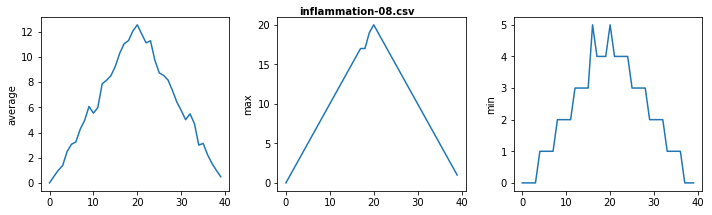

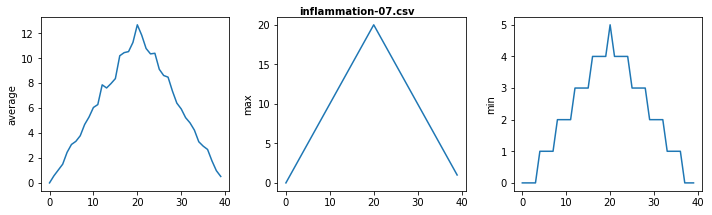

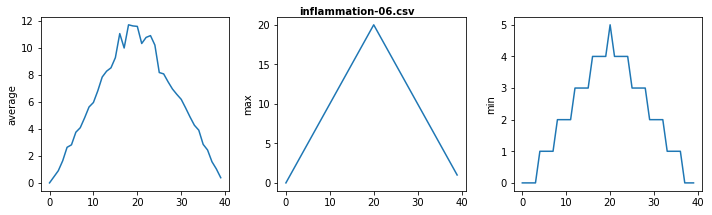

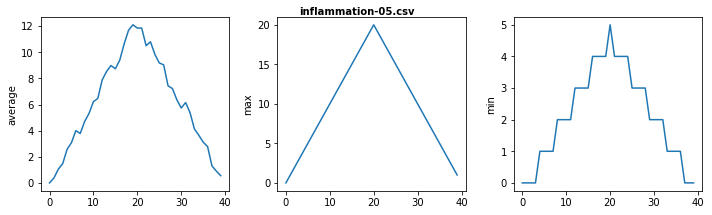

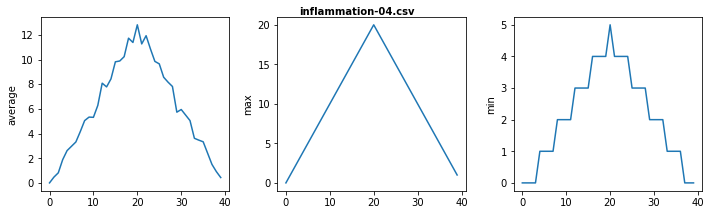

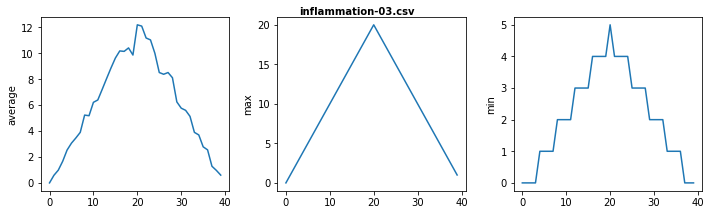

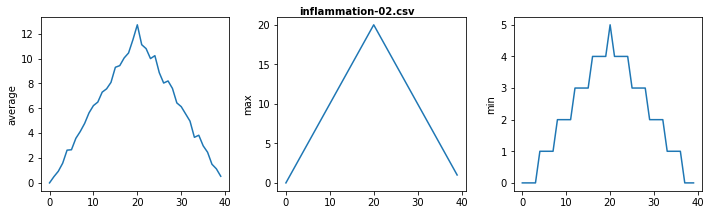

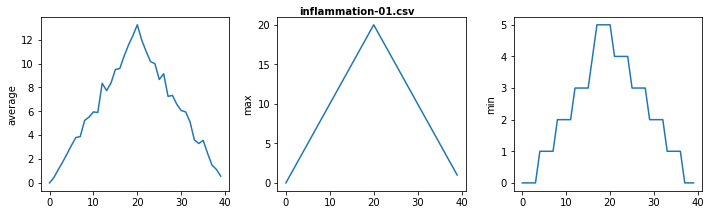

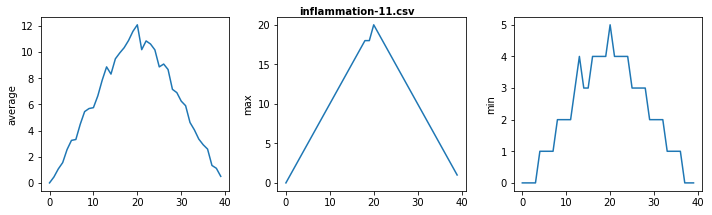

In [37]:
def analyze_all(exp):
    import glob, numpy as np
    from matplotlib import pyplot as plt
    
    for filename in glob.glob(exp):
        data = np.loadtxt(fname=filename,delimiter=',')
        figure = plt.figure(figsize=(10.0, 3.0))
        plt.suptitle(filename, fontsize=10, fontweight="bold")
        plt.subplot(1, 3, 1) # rowa, cols, subplt_kw
        plt.ylabel('average')
        plt.plot(data.mean(0))
        plt.subplot(1, 3, 2)
        plt.ylabel('max')
        plt.plot(data.max(0))
        plt.subplot(1, 3, 3)
        plt.ylabel('min')
        plt.plot(data.min(0))
        plt.tight_layout()
        plt.show()

exp = "inflammation-??.csv"
analyze_all(exp)

#### Key Points

*   Use `for variable in collection` to process the elements of a collection one at a time.
*   The body of a for loop must be indented.
*   Use `len(thing)` to determine the length of something that contains other values.
*   `[value1, value2, value3, ...]` creates a list.
*   Lists are indexed and sliced in the same way as strings and arrays.
*   Lists are mutable (i.e., their values can be changed in place).
*   Strings are immutable (i.e., the characters in them cannot be changed).
*   Use `glob.glob(pattern)` to create a list of files whose names match a pattern.
*   Use `*` in a pattern to match zero or more characters, and `?` to match any single character.

#### Next Steps

We have now solved our original problem:
we can analyze any number of data files with a single command.
More importantly,
we have met two of the most important ideas in programming:

1.  Use functions to make code easier to re-use and easier to understand.
1.  Use lists and arrays to store related values, and loops to repeat operations on them.

We have one more big idea to introduce,
and then we will be able to go back and create a heat map
like the one we initially used to display our first data set.